#### The ImageProcessor class includes methods for inverting colors, converting the image to grayscale, rotating it by 90 degrees, flipping it horizontally, and adjusting transparency. Other transformations include increasing brightness, adding a border, changing the background color, swapping blue and yellow regions, and applying a sepia effect. 

##### Each method processes the image and displays the original alongside the modified version.

##### For color inversion, the RGB values are subtracted from 255, while the alpha channel remains unchanged. 

##### Grayscale conversion averages the red, green, and blue components. 

##### The rotation method repositions pixels using NumPy’s rot90 function, and horizontal flipping mirrors the image along the vertical axis.

##### Transparency is adjusted by scaling the alpha channel.

##### Brightness is increased by multiplying RGB values by a factor while ensuring they stay within the valid range. 

##### The border method expands the image canvas, centering the original inside a black frame. 

##### The background change replaces fully transparent pixels with a specified color. 

##### The swap method detects blue and yellow regions and exchanges them, and the sepia filter applies a transformation to create a warm, vintage look.

##### Each transformation is designed to be efficient while preserving key image properties, with results displayed side by side for comparison.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
class ImageProcessor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = np.array(Image.open(image_path).convert("RGBA"))
    
    def show_images(self, modified_image, title):
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(self.image)
        axes[0].set_title("Original Image")
        axes[0].axis("off") 
        axes[1].imshow(modified_image)
        axes[1].set_title(title)
        axes[1].axis("off")   
        plt.show()
    
    def invert_colors(self):
        modified_image = self.image.copy()
        modified_image[:, :, :3] = 255 - modified_image[:, :, :3]
        self.show_images(modified_image, "Inverted Colors")
    
    def to_grayscale(self):
        grayscale = np.mean(self.image[:, :, :3], axis=2, keepdims=True).astype(np.uint8)
        modified_image = np.concatenate([grayscale, grayscale, grayscale, self.image[:, :, 3:]], axis=2)
        self.show_images(modified_image, "Grayscale")
    
    def rotate_90(self):
        modified_image = np.rot90(self.image, k=-1, axes=(0, 1))
        self.show_images(modified_image, "Rotated 90° Clockwise")
    
    def flip_horizontal(self):
        modified_image = np.flip(self.image, axis=1)
        self.show_images(modified_image, "Flipped Horizontally")
    
    def change_transparency(self, fraction):
        modified_image = self.image.copy()
        modified_image[:, :, 3] = (modified_image[:, :, 3] * fraction).astype(np.uint8)
        self.show_images(modified_image, "Semi-Transparent")
    
    def increase_brightness(self, factor):
        modified_image = self.image.copy()
        modified_image[:, :, :3] = np.clip(modified_image[:, :, :3] * factor, 0, 255).astype(np.uint8)
        self.show_images(modified_image, "Brighter Image")
    
    def add_border(self, border_size):
        new_shape = (self.image.shape[0] + 2 * border_size, self.image.shape[1] + 2 * border_size, 4)
        modified_image = np.full(new_shape, [0, 0, 0, 255], dtype=np.uint8)
        modified_image[border_size:border_size + self.image.shape[0], border_size:border_size + self.image.shape[1]] = self.image
        self.show_images(modified_image, "Image with Border")
    
    def change_background(self, new_color=(0, 255, 0)):
        modified_image = self.image.copy()
        alpha_channel = modified_image[:, :, 3]
        for i in range(3):
            modified_image[:, :, i] = np.where(alpha_channel == 0, new_color[i], modified_image[:, :, i])
        modified_image[:, :, 3] = 255
        self.show_images(modified_image, "Green Background")
    
    def swap_blue_yellow(self):
        modified_image = self.image.copy()
        blue_mask = (modified_image[:, :, 0] < 100) & (modified_image[:, :, 2] > 150)
        yellow_mask = (modified_image[:, :, 0] > 200) & (modified_image[:, :, 2] < 100)
        
        modified_image[blue_mask, :3] = np.array([255, 215, 0], dtype=np.uint8)  
        modified_image[yellow_mask, :3] = np.array([0, 0, 255], dtype=np.uint8) 
        
        self.show_images(modified_image, "Swapped Blue & Yellow")
    
    def apply_sepia(self):
        modified_image = self.image.copy()
        r, g, b = modified_image[:, :, 0], modified_image[:, :, 1], modified_image[:, :, 2]
        modified_image[:, :, 0] = np.clip(0.393 * r + 0.769 * g + 0.189 * b, 0, 255)
        modified_image[:, :, 1] = np.clip(0.349 * r + 0.686 * g + 0.168 * b, 0, 255)
        modified_image[:, :, 2] = np.clip(0.272 * r + 0.534 * g + 0.131 * b, 0, 255)
        self.show_images(modified_image.astype(np.uint8), "Sepia Effect")


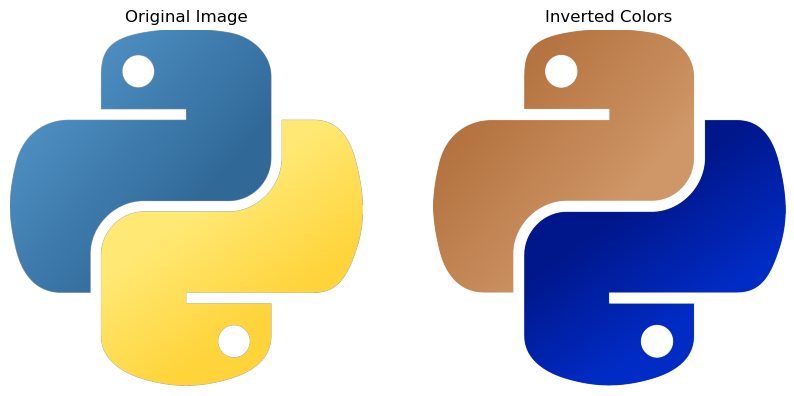

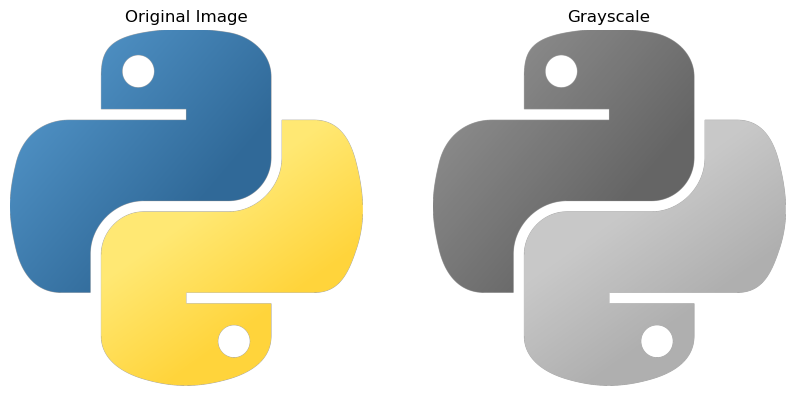

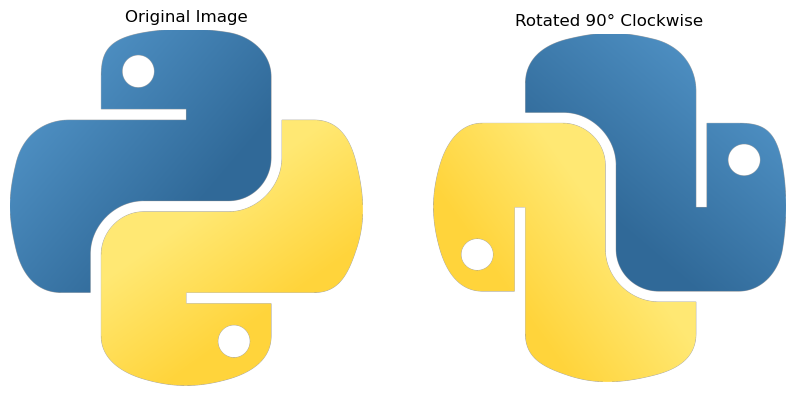

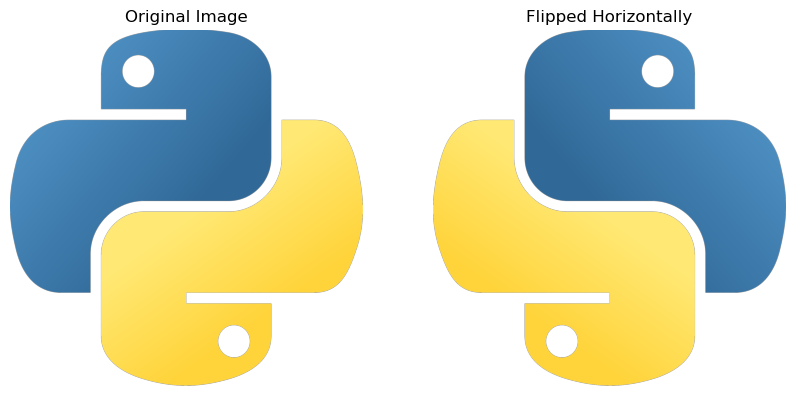

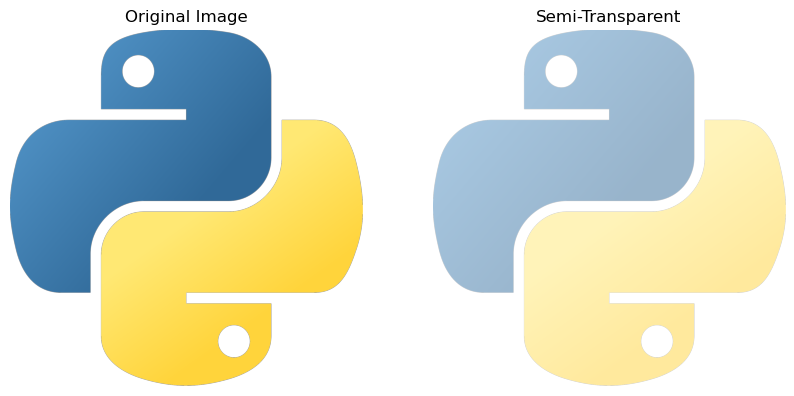

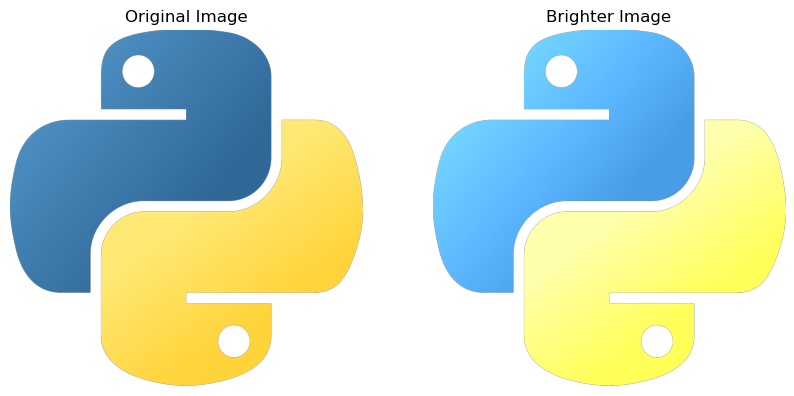

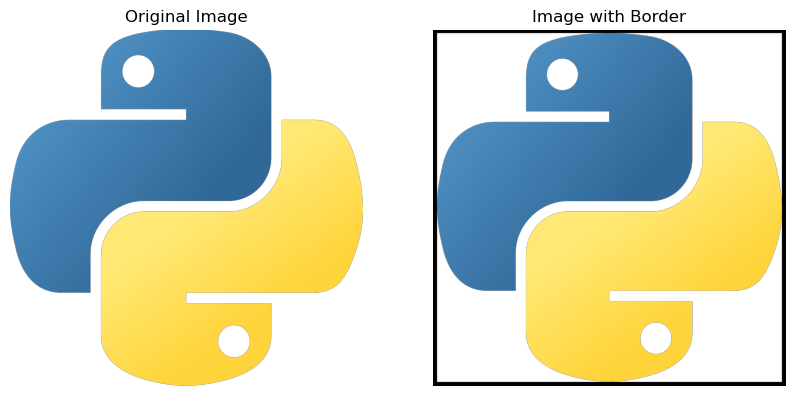

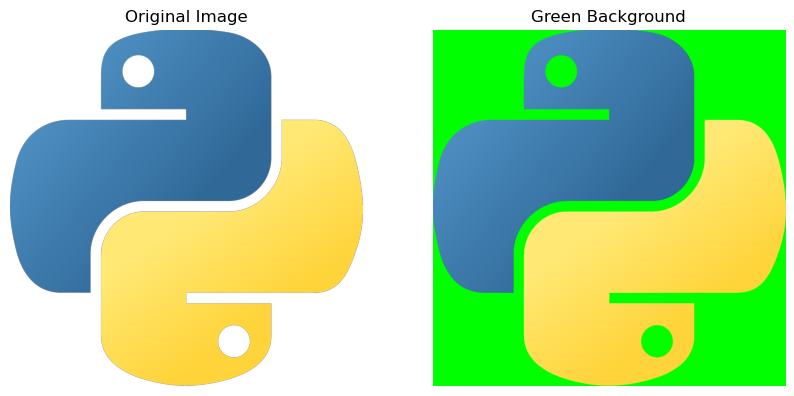

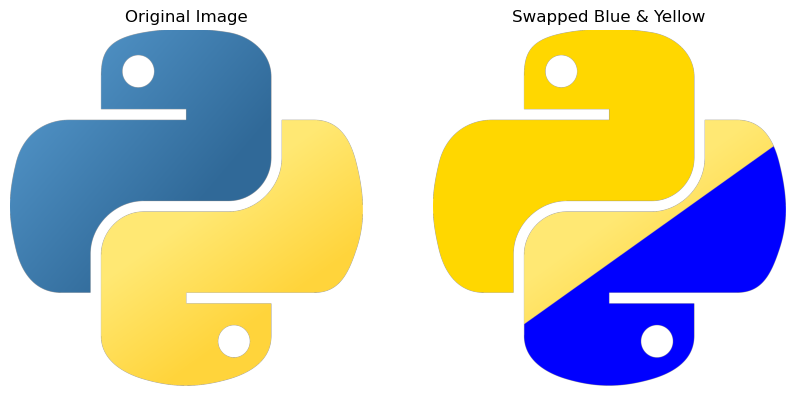

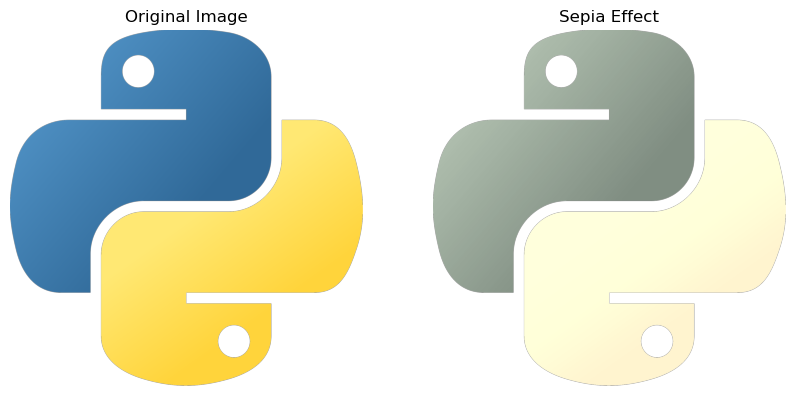

In [3]:
#USAGE
image_path = "python-logo.png"
processor = ImageProcessor(image_path)
processor.invert_colors()
processor.to_grayscale()
processor.rotate_90()
processor.flip_horizontal()
processor.change_transparency(0.5)
processor.increase_brightness(1.5)
processor.add_border(20)
processor.change_background()
processor.swap_blue_yellow()
processor.apply_sepia()
